## 참고 사이트

+ https://matplotlib.org/
+ https://seaborn.pydata.org/

In [1]:
import pandas as pd
import numpy as np
#실제 그래프를 그릴 수 있는 서브 함수
import matplotlib.pyplot as plt
import seaborn as sns

#경고표시 생략(일시적으로 생략하는게 좋음) 
import warnings
warnings.filterwarnings(action='ignore')

#한글폰트 지정 
import matplotlib.font_manager as fm
font_name= fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font",family=font_name)

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

### 1. 선그래프

<AxesSubplot:>

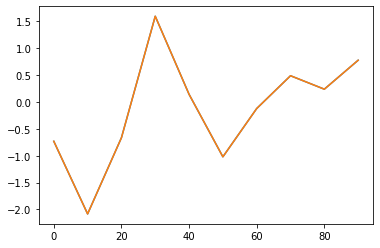

In [21]:
# 선그래프는 시리즈로 맞춰주면 그 즉시 그릴 수 있다.
s= pd.Series(np.random.randn(10),index=np.arange(0,100,10))
s

s.plot()
s.plot.line()

<AxesSubplot:>

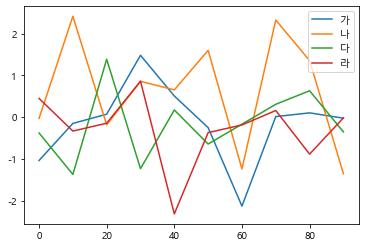

In [31]:
df1= pd.DataFrame(np.random.randn(10,4),columns=['가','나','다','라'],
                 index=np.arange(0,100,10))
df1.plot()
#한글 폰트가 현재 지원이 안됨 - 별도로 폰트를 지정해줘야함. 


<AxesSubplot:>

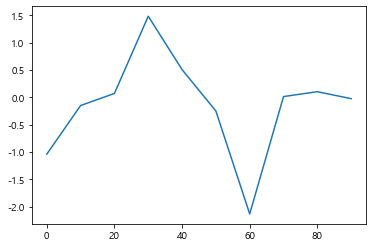

In [32]:
df1['가'].plot()

### 2. 막대 그래프

<AxesSubplot:>

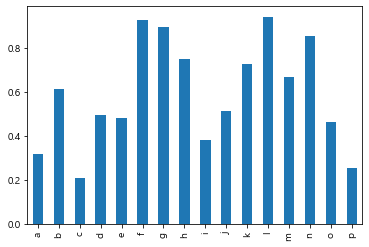

In [38]:
s2 = pd.Series(np.random.rand(16),index=list('abcdefghijklmnop'))
s2

s2.plot(kind='bar')
# s2.plot.bar() 같은것 

<AxesSubplot:>

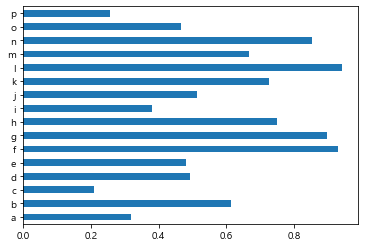

In [40]:
#수평으로 막대를 그릴때 
s2.plot(kind='barh')
s2.plot.barh()

<AxesSubplot:>

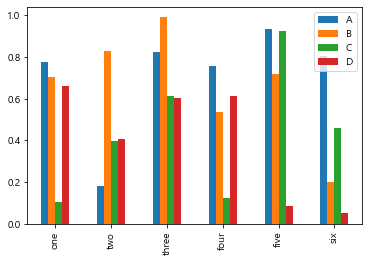

In [47]:
df2=pd.DataFrame(np.random.rand(6,4),index=['one','two','three','four','five','six'],
                columns=['A','B','C','D'])
df2

#데이터 프레임으로 그리면 칼럼별로 동시에 그림
df2.plot(kind='bar')

<AxesSubplot:>

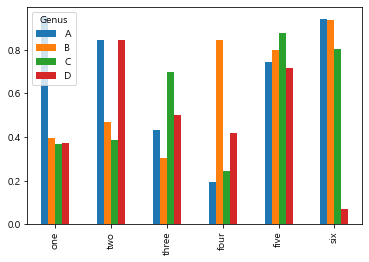

In [52]:
#범례 이름 붙이기
df2=pd.DataFrame(np.random.rand(6,4),index=['one','two','three','four','five','six'],
                columns=pd.Index(['A','B','C','D'],name='Genus'))

df2.plot(kind='bar')

<AxesSubplot:>

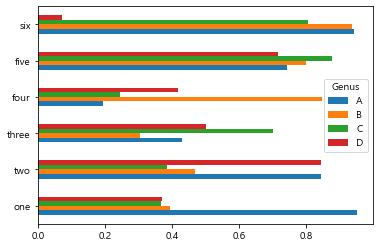

In [53]:
df2.plot(kind='barh')

<AxesSubplot:>

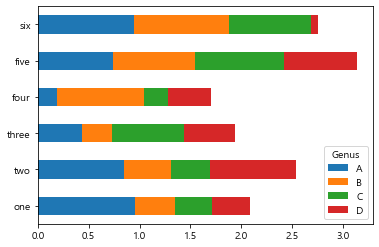

In [54]:
#그래프 쌓기 
df2.plot(kind='barh',stacked=True)

### 3. histogram
+ 하나의 변수를 가지고 그래프를 그림 -> 양적 데이터를 가지고 그림
+ x변수가 가질 수 있는 값의 범위
+ 값만 필요 인덱스가 필요가 없다.

<AxesSubplot:>

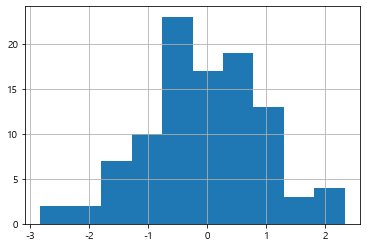

In [62]:
#normal --> 정규분포 안에서 난수를 구하는 것 
s= pd.Series(np.random.normal(0,1,size=100))
s

s.hist() # 기본적 막대는 10개 

<AxesSubplot:>

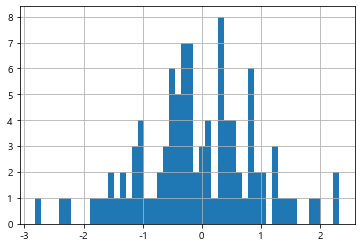

In [63]:
# 좀더 막대를 늘려서 디테일하게 분포현황을 보기 위해서
s.hist(bins=50)

### 4.산포도(산점도,scatter plot)

+ 두 변수의 관계를 확인: 양,음 0 

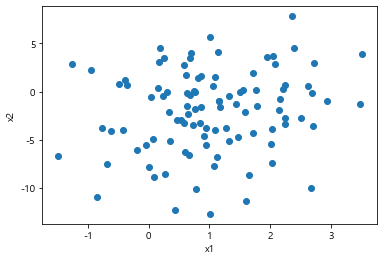

In [23]:
x1 = np.random.normal(1,1,size=(100,1))
x1

x2= np.random.normal(-2,4,size=(100,1))
x2

# 데이터를 가급적으로 시리즈나, 데이터 프레임으로 만들어 줘야 함 
# 변수를 하나로
# concatenate 차원 유지 합치기 
x = np.concatenate((x1,x2),axis=1)
x[:5]

# 데이터 프레임으로 바꾸기
df=pd.DataFrame(x,columns=['x1','x2'])
df

# 그래프 그리기 
df.plot.scatter('x1','x2')
plt.scatter(df['x1'],df['x2'])

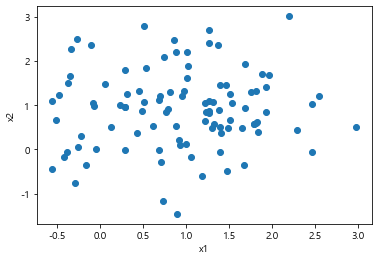

In [21]:
x1 = np.random.normal(1,1,size=(100,1))
x1

# 범위를 같게 한다면
x2= np.random.normal(1,1,size=(100,1))
x2

x = np.concatenate((x1,x2),axis=1)
x[:5]


df=pd.DataFrame(x,columns=['x1','x2'])
df


df.plot.scatter('x1','x2')
plt.scatter(df['x1'],df['x2'])

#관계가 좀 더 보임

### 5.상자 그래프(box plot)


<AxesSubplot:>

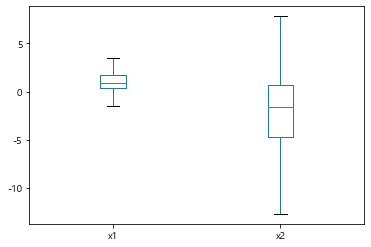

In [24]:
df.plot.box()

### 6. 활용 예제1 

+ seaborn의 tips 샘플

#### (1) 데이터 준비

In [2]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### (2)  total_bill에 대한 금액분포 확인

<AxesSubplot:>

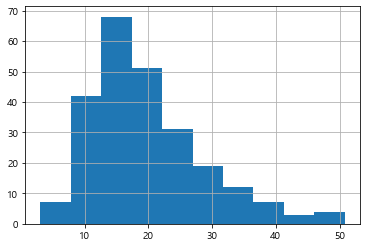

In [26]:
tips['total_bill'].hist()

<AxesSubplot:>

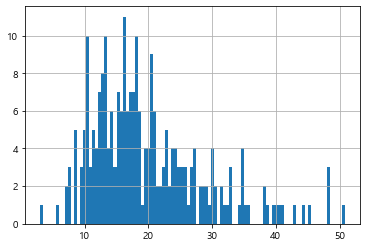

In [27]:
tips['total_bill'].hist(bins=100)

Text(0, 0.5, 'total_bill')

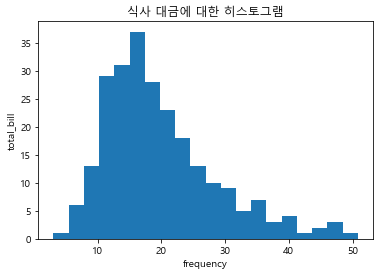

In [34]:
# 기본적인 형식을 지킬때? 
# --> 그래프의 메타정보를 지정?
fig=plt.figure()

#그래프를 몇개 그릴것인지
ax=fig.add_subplot(1,1,1)#몇행 몇열 짜리 그래프인지(개수), 세번째는 몇번째 그래프 선택이냐 
#e.g. (2,1,1) --> a 그래프 --> 0번째
             #    b 그래프 --> 2행 1열의 1번째 얘를 가르키는 것임 

ax.hist(tips['total_bill'],bins=20)
ax.set_title('식사 대금에 대한 히스토그램')
ax.set_xlabel('frequency')
ax.set_ylabel('total_bill')


#### (2) total_bill 과 tip의 관계를 알고 싶다.

Text(0, 0.5, 'Tip')

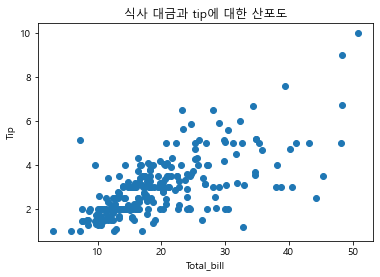

In [35]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(tips['total_bill'],tips['tip'])
ax.set_title('식사 대금과 tip에 대한 산포도')
ax.set_xlabel('Total_bill')
ax.set_ylabel('Tip')

#### (3 )  성별에 따른 total_bill 과 tip의 관계를 알고 싶다면?

+ botplot
+ 산포도 - 색상으로 구분 

In [39]:
tips

#sex는 지금 문자로 되어 있기 때문에 숫자로 바꿔줄 필요가 있음. 
def record_sex(sex):
    if sex== 'Female':
        return 0
    else:
        return 1

tips['sex_color'] = tips['sex'].apply(record_sex)
tips.head()



,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


Text(0, 0.5, 'Tip')

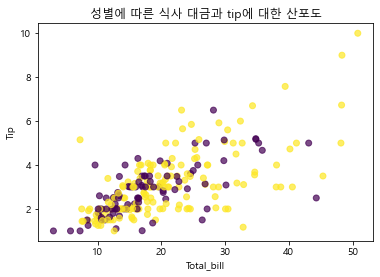

In [42]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(tips['total_bill'],tips['tip'],c=tips['sex_color'],alpha=.7) # alpah == 투명도
ax.set_title('성별에 따른 식사 대금과 tip에 대한 산포도')
ax.set_xlabel('Total_bill')
ax.set_ylabel('Tip')

# 남여 구분도 안되고.. 좀 억지고 사용하는

#### (4)성별과 인원수(점을 크게, 작게) 따른 total_bill 과 tip의 관계를 알고 싶다면?

Text(0, 0.5, 'Tip')

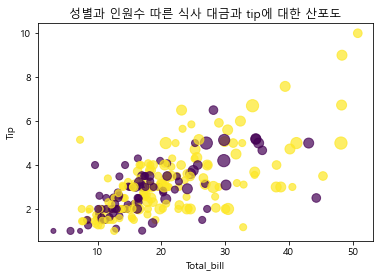

In [46]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(tips['total_bill'],tips['tip'],c=tips['sex_color'],alpha=.7,
          s=tips['size']*25) # alpah == 투명도
ax.set_title('성별과 인원수 따른 식사 대금과 tip에 대한 산포도')
ax.set_xlabel('Total_bill')
ax.set_ylabel('Tip')

#### (5) 성별과 팁의 관계 

Text(0, 0.5, 'Tip')

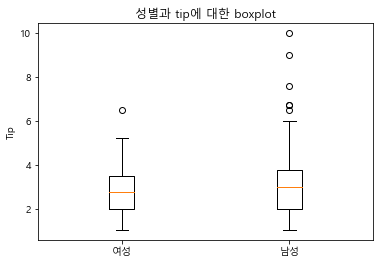

In [3]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.boxplot([tips[tips['sex']=='Female']['tip'],tips[tips['sex']=='Male']['tip']],
          labels=['여성','남성'])

ax.set_title('성별과 tip에 대한 boxplot') # 주로 연속변수, 이상치있을 경우
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

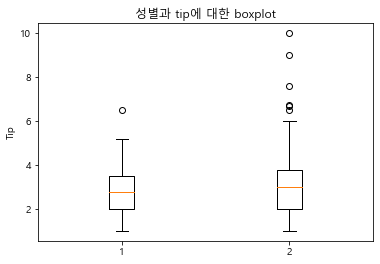

In [4]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.boxplot([tips[tips['sex']=='Female']['tip'],tips[tips['sex']=='Male']['tip']],
          labels=['여성','남성'])

ax.set_title('성별과 tip에 대한 boxplot') # 주로 연속변수, 이상치있을 경우
ax.set_ylabel('Tip')

### 7.활용 예제2 
+ 전국 신규 민간아파트 분양가격 동향
+ https://data.go.kr/dataset/3035522/fileData.do


#### (1) 데이터 준비

In [3]:
apt = pd.read_csv('data/20200331.csv',encoding='euc-kr')
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4590 non-null   object
 1   규모구분     4590 non-null   object
 2   연도       4590 non-null   int64 
 3   월        4590 non-null   int64 
 4   분양가격(㎡)  4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [4]:
apt.head(10)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
5,인천,전체,2015,10,3163
6,인천,전용면적 60㎡이하,2015,10,3488
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545
9,인천,전용면적 102㎡초과,2015,10,3408


In [5]:
##### column 이름을 영어로 변경(city, size, year,month,price), price는 숫자로 변경 

apt1 =apt
apt1.columns=['city','size','year','month','price']
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    4590 non-null   object
 1   size    4590 non-null   object
 2   year    4590 non-null   int64 
 3   month   4590 non-null   int64 
 4   price   4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [6]:
# 문자형을 숫자형으로 바꿀때, 공백이 있으면 안됨 제거해줘야함. 
apt1['price']=pd.to_numeric(apt1['price'].str.strip())
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    4590 non-null   object 
 1   size    4590 non-null   object 
 2   year    4590 non-null   int64  
 3   month   4590 non-null   int64  
 4   price   4260 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 179.4+ KB


In [26]:
#### 서울만 선택해서 규모가 전체인 것만 
# apt1.head()

apt_sa =apt1[(apt1['city']=='서울') &(apt1['size']=='전체')]

In [13]:
# 조회를 전문적으로 해주는 
apt1.query('(city=='서울') and (size=='전체')')

SyntaxError: invalid syntax (<ipython-input-13-399c20d760e9>, line 2)

In [28]:
##### city, size 컬럼을 삭제하고 다중 index로 (year,month) 조정 
apt_graph = apt_sa.drop(['city','size'],axis=1)

In [29]:
apt_graph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 4505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    54 non-null     int64  
 1   month   54 non-null     int64  
 2   price   54 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.7 KB


In [30]:
apt_graph=apt_graph.set_index(['year','month'])
apt_graph

price
year month        
2015 10     5841.0
     11     6050.0
     12     6041.0
2016 1      6108.0
     2      6111.0
     3      6173.0
     4      6241.0
     5      6264.0
     6      6208.0
     7      6254.0
     8      6285.0
     9      6283.0
     10     6400.0
     11     6370.0
     12     6443.0
2017 1      6450.0
     2      6464.0
     3      6370.0
     4      6366.0
     5      6400.0
     6      6667.0
     7      6573.0
     8      6172.0
     9      6507.0
     10     6578.0
     11     6657.0
     12     6706.0
2018 1      6623.0
     2      6631.0
     3      6836.0
     4      6841.0
     5      6919.0
     6      6694.0
     7      6820.0
     8      6731.0
     9      6994.0
     10     7378.0
     11     7369.0
     12     7398.0
2019 1      7600.0
     2      7627.0
     3      7772.0
     4      7784.0
     5      7786.0
     6      8100.0
     7      8067.0
     8      8093.0
     9      8085.0
     10     8091.0
     11     8062.0
     12     7955.0
2020 1      8121.0
     2      7972.0
     3      8029.0

<AxesSubplot:xlabel='year,month'>

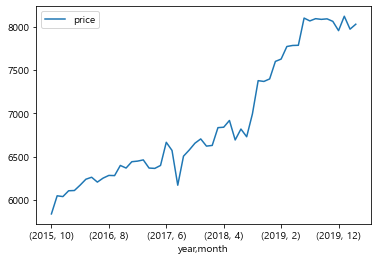

In [31]:
apt_graph.plot()

### 8. seaborn

In [32]:
import seaborn as sns

In [33]:
tips = sns.load_dataset('tips')

Text(0, 0.5, 'Total_bill')

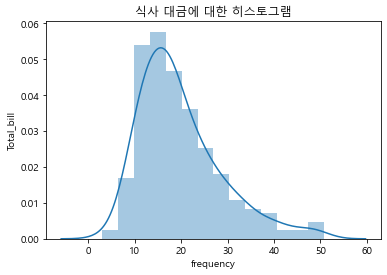

In [36]:
##### total_bill 에 대한 금액 분포 확인
ax=sns.distplot(tips['total_bill'])
ax.set_title('식사 대금에 대한 히스토그램')
ax.set_xlabel('frequency')
ax.set_ylabel('Total_bill')

Text(0, 0.5, 'Total_bill')

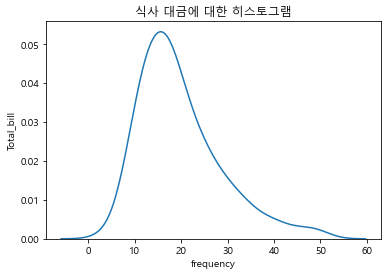

In [37]:
ax=sns.distplot(tips['total_bill'],hist=False)
ax.set_title('식사 대금에 대한 히스토그램')
ax.set_xlabel('frequency')
ax.set_ylabel('Total_bill')

Text(0, 0.5, 'Total_bill')

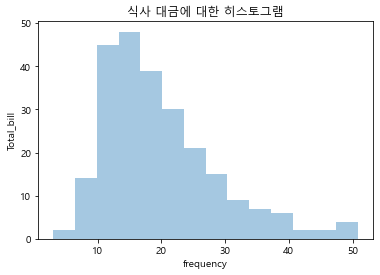

In [38]:
ax=sns.distplot(tips['total_bill'],kde=False)
ax.set_title('식사 대금에 대한 히스토그램')
ax.set_xlabel('frequency')
ax.set_ylabel('Total_bill')

Text(0, 0.5, 'Total_bill')

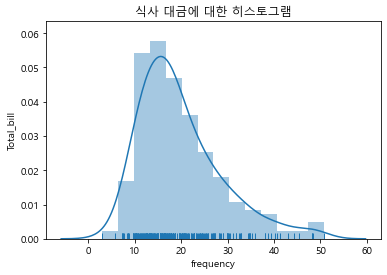

In [39]:
ax=sns.distplot(tips['total_bill'],rug=True) # 어디가 집중적으로 많이 분포되어 있는지 확인 가능(rug)
ax.set_title('식사 대금에 대한 히스토그램')
ax.set_xlabel('frequency')
ax.set_ylabel('Total_bill')

<AxesSubplot:xlabel='day', ylabel='count'>

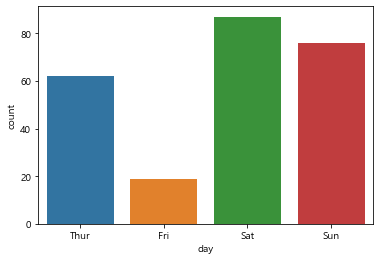

In [40]:
##### 요일별로 인원수 파악 
sns.countplot('day',data=tips)

In [41]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

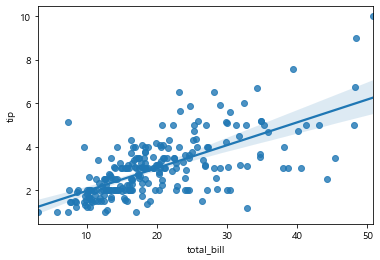

In [42]:
sns.regplot(x='total_bill',y='tip',data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

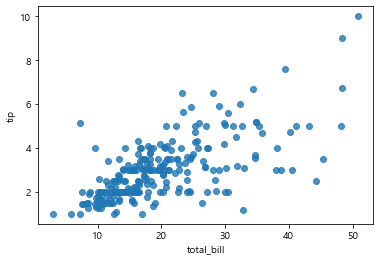

In [44]:
#회귀선을 뺴고 싶을 때 
sns.regplot(x='total_bill',y='tip',data=tips,fit_reg=False)

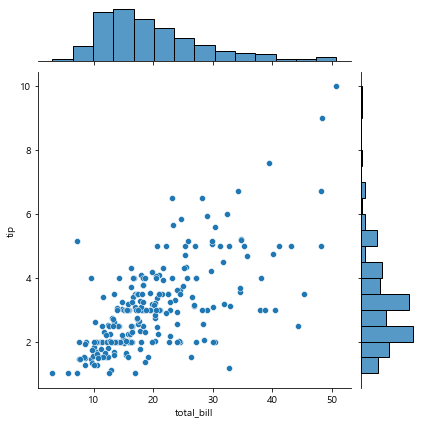

In [45]:
#산포도와 히스토그램을 동시에
sns.jointplot(x='total_bill',y='tip',data=tips)

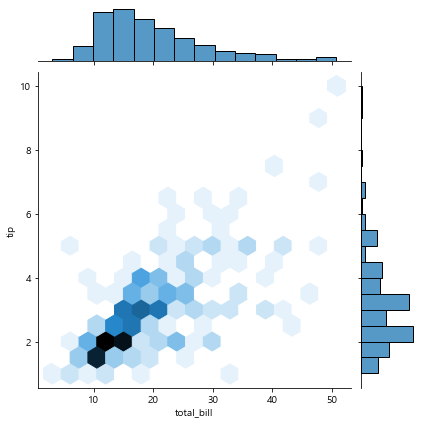

In [46]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

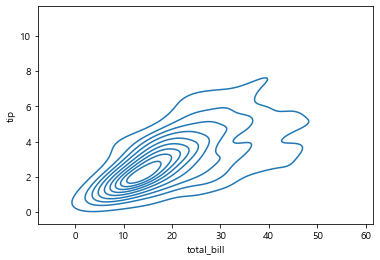

In [49]:
#이차원 밀집도
sns.kdeplot(x='total_bill',y='tip',data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

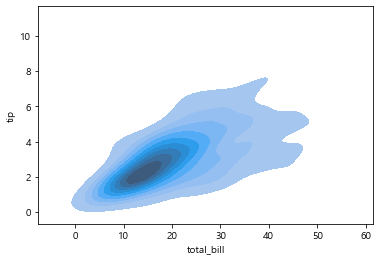

In [50]:
sns.kdeplot(x='total_bill',y='tip',data=tips,shade=True)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

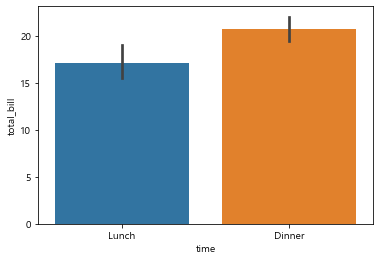

In [51]:
#막대 그래프
sns.barplot(x='time',y='total_bill',data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

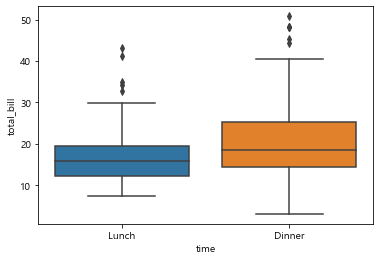

In [52]:
sns.boxplot(x='time',y='total_bill',data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

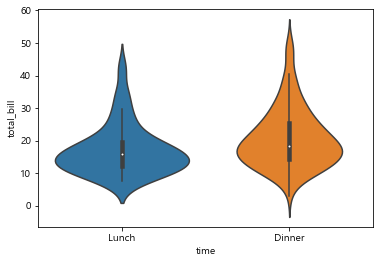

In [53]:
sns.violinplot(x='time',y='total_bill',data=tips)

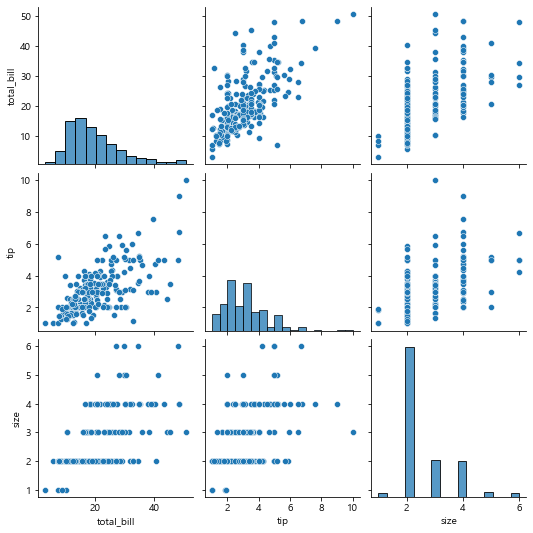

In [54]:
#여러개를 한번에 비교
sns.pairplot(tips)

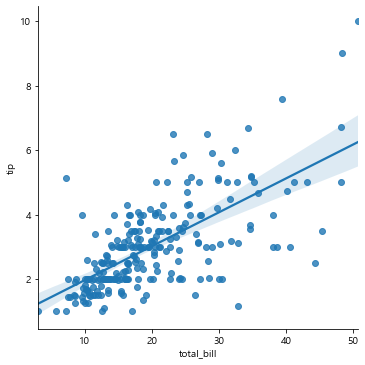

In [55]:
##### 성별에 따른 total_bill 과 tip의 관계를 알고 싶다.
sns.lmplot(x='total_bill',y='tip',data=tips)

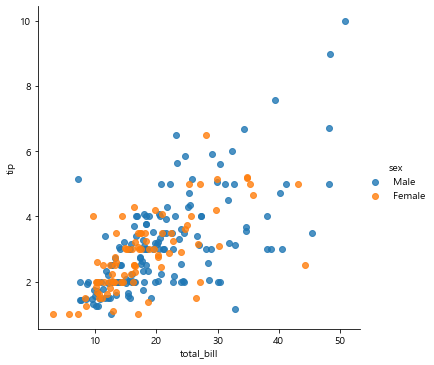

In [57]:
#회귀선 빼기(fit_reg=False) + hue='sex' 어느게 남자고 여자인지 표시도 해줌
sns.lmplot(x='total_bill',y='tip',data=tips,fit_reg=False,hue='sex')

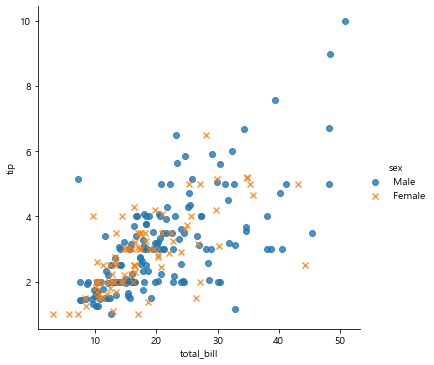

In [58]:
# 점의 모양도 바꿀 수 있음.
sns.lmplot(x='total_bill',y='tip',data=tips,fit_reg=False,hue='sex',
          markers=['o','x'])

### 9. 활용 예제

+ 타이타닉 샘플 : https://www.kaggle.com/c/titanic


#### (1) 데이터 준비

In [36]:
train = pd.read_csv('data/train.csv')
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
##### 결측치 확인

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### (2) EDA(Explorer Data Analysis

In [31]:
# 다 똑같은 것을 계속 코드 입력해서 하기 귀찮으니까 함수를 만들어서 해보자

def bar_chart(feature):
    survived =train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    
    df= pd.DataFrame([survived, dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

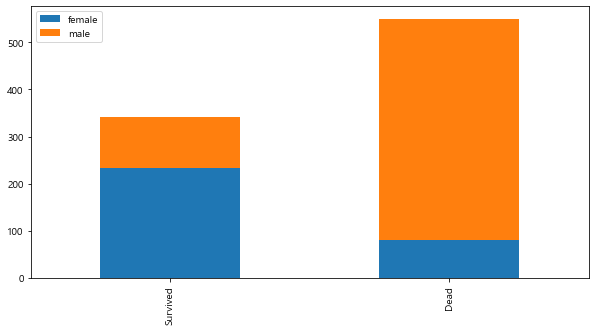

In [73]:
##### 성별에 따른 생존 여부
bar_chart('Sex')

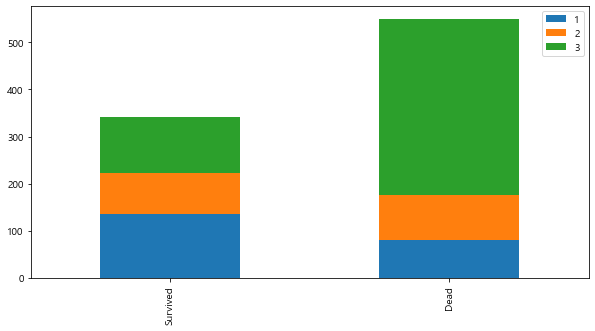

In [68]:
##### 객실등급에 따른 생존 여부
bar_chart('Pclass')


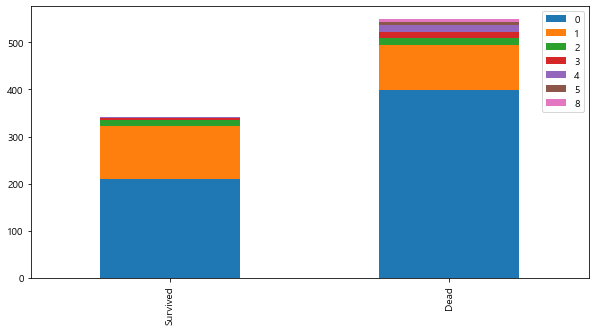

In [75]:
##### 동승(자매, 배우자)여부에 따른 생존 여부
bar_chart('SibSp')

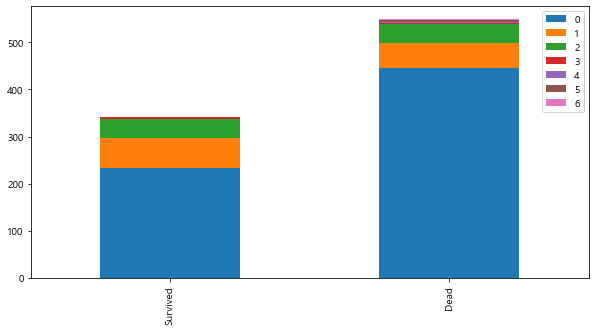

In [76]:
##### 동승(부모와 자식) 여부에 따른 생존 여부
bar_chart('Parch')

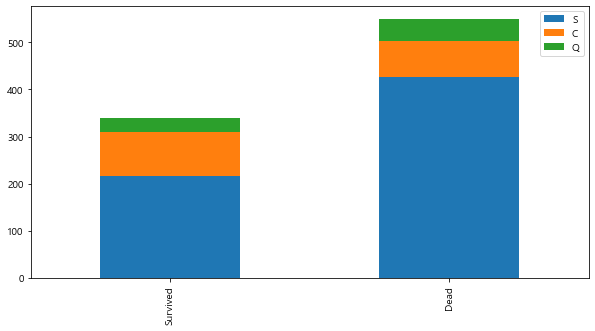

In [74]:
##### 정박지 여부에 따른 생존여부
bar_chart('Embarked')

#### (3) Feature Engineering --> 인사이트 뽑기 쉽게 

In [15]:
##### 이름에서 호칭에 대한 부분 추출하기

train['Title'] = train['Name'].str.extract(", (\w+).").value_counts()


TypeError: incompatible index of inserted column with frame index

In [13]:
train['Name'].str.extract(", ([a-zA-Z]+).").value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Sir           1
Ms            1
Capt          1
Mme           1
Lady          1
Jonkheer      1
Don           1
the           1
dtype: int64

In [16]:
train["Name"].str.extract("(Mr[.]|Mrs[.]|Miss[.])").value_counts()


Mr.      517
Miss.    182
Mrs.     125
dtype: int64

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,Mr


In [38]:
train['title']=train["Name"].str.extract(" ([A-Za-z]+)\.")# \. 그냥 점만
train['title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Lady          1
Jonkheer      1
Don           1
Sir           1
Capt          1
Countess      1
Mme           1
Ms            1
Name: title, dtype: int64

In [39]:

# 숫자로 바꿔주면 좋겠거든 (머신러닝을 위해)
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Major":3, "Mlle":3,
                "Col":3, "Sir":3, "Don":3, "Mme":3, "Lady":3, "Jonkheer":3, "Countess":3,
                "Capt":3, "Ms":3}
train['title']=train['title'].map(title_mapping)
train['title'].value_counts()

0    517
1    182
2    125
3     67
Name: title, dtype: int64

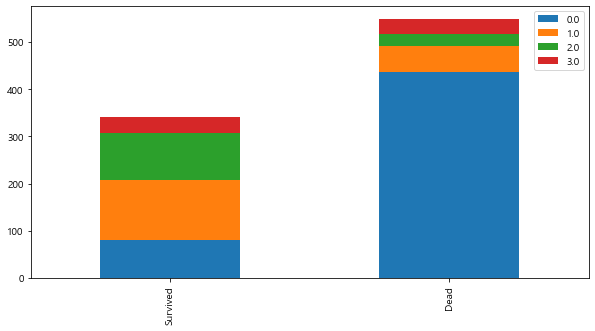

In [32]:
bar_chart('title')

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [43]:
##### Age --> 중요변수인데 결측치가 너무 많아 버러야 할까?? 
# 결측치를 다른 값으로 바꿔 넣으면 좋지 않을까? 

print(train.groupby('title')['Age'].mean())
train['Age'].fillna(train.groupby('title')['Age'].transform('median'),inplace=True)

title
0    32.368090
1    21.773973
2    35.898148
3    20.430161
Name: Age, dtype: float64


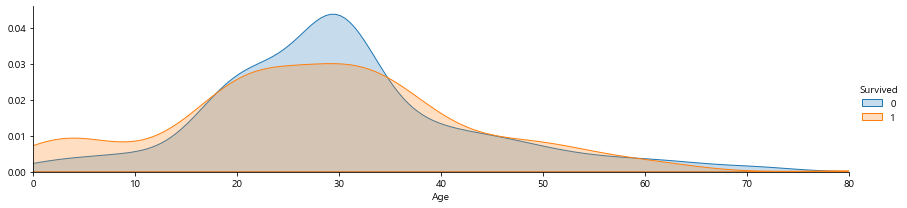

In [61]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.add_legend() # 범례 생성  
facet.set(xlim=(0,train['Age'].max()))

(20.0, 30.0)

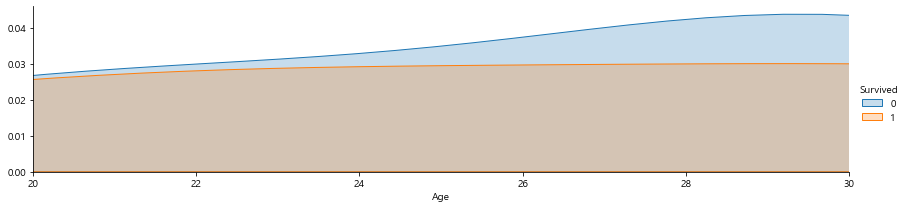

In [60]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.add_legend() # 범례 생성  
facet.set(xlim=(0,train['Age'].max()))
plt.xlim(20,30) # 특정 옵션 부분 자세히 보기 위해

----
### 10. 지도 시각화 
+ pip install folium

In [8]:
#도스명령창에 
pip install folium 

!pip install folium->웹상

SyntaxError: invalid syntax (<ipython-input-8-7ff3d23a05ae>, line 2)

In [2]:
import folium

In [3]:
folium.Map(location=[37.50485045470902, 126.9390472124736],zoom_start=30) # ,zoom_start= 화면 확대 

In [11]:
folium.Map(location=[37.49797072708126, 127.02754068897248],zoom_start=30,tiles='Stamen Toner') # 길에 더 집중하게

In [10]:
# 내가 분석한 결과 값을 지도에 표시해야함. 그냥 지도만 출력하는 것은 의미가 없음 


#### (1) 미국 50개 주의 실업률 표시

In [14]:
state_unemp=pd.read_csv('data/map/folium_US_Unemployment_Oct2012.csv')
state_unemp.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [27]:
map=folium.Map(location=[40,-98],zoom_start=4)

#표시할것을 따올려면 json -> 파이썬의 dict와 유사

state_geo='data/map/folium_us-states.json'
#innerjoin이 되야 함 
map.choropleth(geo_data=state_geo, data=state_unemp,key_on='feature.id',
              columns=['State','Unemployment'],fill_color='YlGn')
map

#### (2) 마킹

In [ ]:
# 지도 위에다가 표시를 할때, 마킹할 수 있는 방법


In [35]:
map=folium.Map(location=[37.49797072708126, 127.02754068897248],zoom_start=15) 
map
marker=folium.Marker(location=[37.49797072708126, 127.02754068897248],icon=folium.Icon(color='red',icon='star')) #-> 마크만 만든것
marker.add_to(map)
map
folium.Marker(location=[37.49797072708126, 127.02754068897248],icon=folium.Icon(color='red',icon='star'),
             popup='강남역 근처').add_to(map) # 팝업에 데이터를 넣어주면 데이터들이 클릭하면 나오게됨;
map

In [36]:
# 범위를 표시하고 싶다면 
folium.CircleMarker(location=[37.49797072708126, 127.02754068897248],popup='강남역 근처',
                   radius=50,color='#ffffgg',fill_color='#fffggg').add_to(map)
map

----

### 11. WordCloud

+ pip install wordcloud --> 콘솔창에다가

In [4]:
from wordcloud import WordCloud,STOPWORDS
#stopwoerd 가 불용어 사전 - 영어일때만 

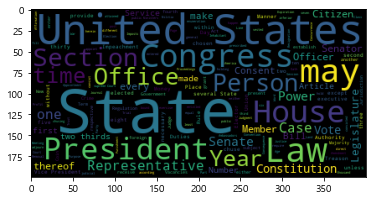

In [63]:
text = open('data/wordcloud/constitution.txt')
text=text.read() # 블러온 파일 읽어오기 
text

# 어떤 문장에서 단어들을 골라서 개수를 세주는 것이 워드클라우드.  --> 단 영어만 가능 
wc=WordCloud().generate(text)
dir(wc) # 속성, 함수 확인
wc.words_ # 각단어의 비율
plt.imshow(wc)#데이터를 이미지화,,,, 영어일때 이렇게 간단하게 나옴 

(-0.5, 399.5, 199.5, -0.5)

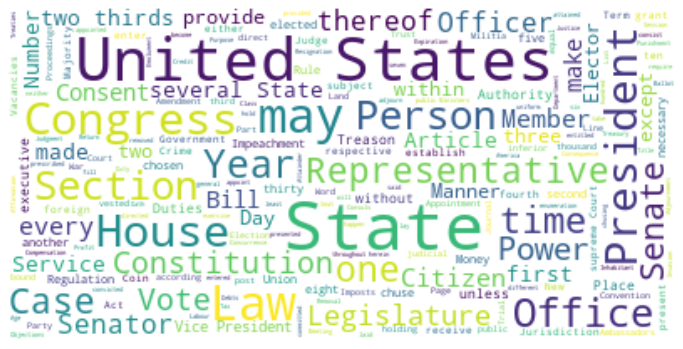

In [65]:
#옵션 설정
#글자 크기 최대 40, 배경 흰색
#그래프 크기 12,12
wc= WordCloud(max_font_size=40,background_color='white').generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation="bilinear")
#눈금 없애기
plt.axis('off')
#글자가 커지면 부자연스러움이 발생 interpolation="bilinear" 이걸 쓰면 조금 보정됨

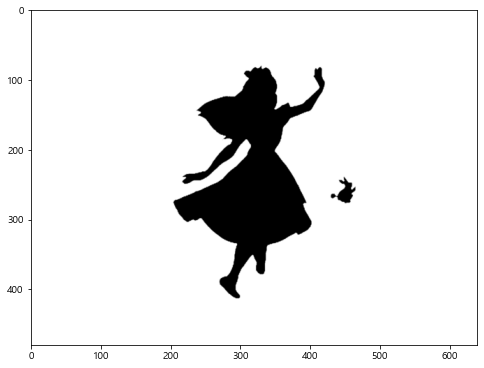

In [55]:
# 이미지를 그래프로 그리기 
from PIL import Image
# Image.open('data/wordcloud/alice_mask.png')
#이미지를 숫자로 변경
alice_mask=np.array(Image.open('data/wordcloud/alice_mask.png'))

plt.figure(figsize=(8,8))
plt.imshow(alice_mask)

(-0.5, 639.5, 479.5, -0.5)

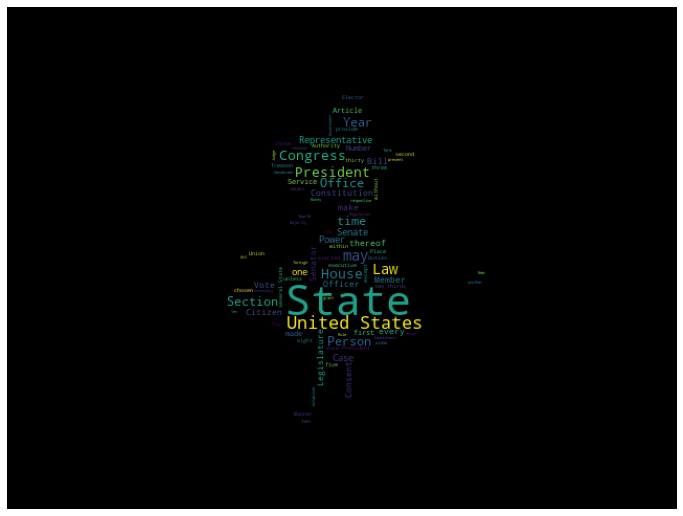

In [58]:
#이 이미지에 워드클라우드 합쳐서 나타내기 
wc=WordCloud(max_font_size=40,background_color='black',mask=alice_mask).generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis('off')

(-0.5, 639.5, 479.5, -0.5)

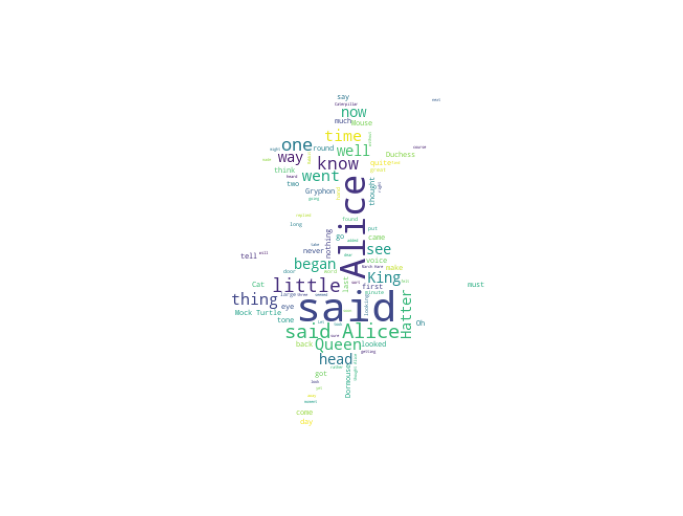

In [67]:
#엘리스 책에서 워드클라우드 
text=open('data/wordcloud/alice.txt').read()
text

wc=WordCloud(max_font_size=40,background_color='white',mask=alice_mask).generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis('off')

(-0.5, 639.5, 479.5, -0.5)

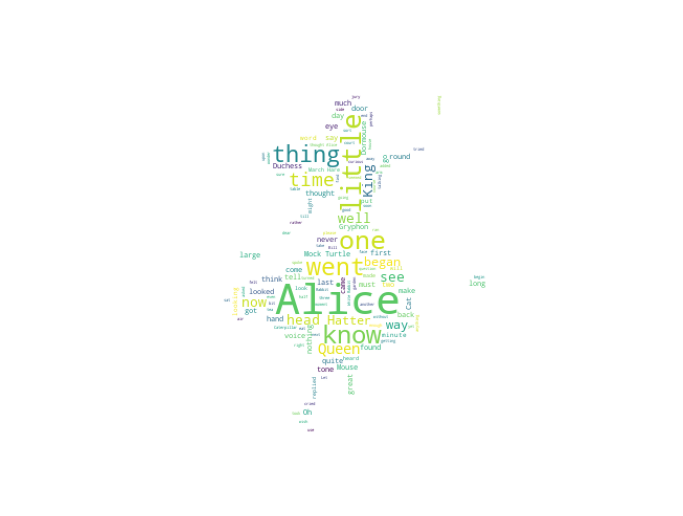

In [69]:
# 불용어 사전 - said 같은 의미 없는 단어들은 빼버리자 
text=open('data/wordcloud/alice.txt').read()
text

#불용어 사전 설정
stopwords = set(STOPWORDS)
stopwords.add('said')

#여기다가도 알려줘야함. 옵션이 있음 stopwords라는 
wc=WordCloud(max_font_size=40,background_color='white',mask=alice_mask,
            stopwords=stopwords).generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis('off')

In [68]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

(-0.5, 639.5, 479.5, -0.5)

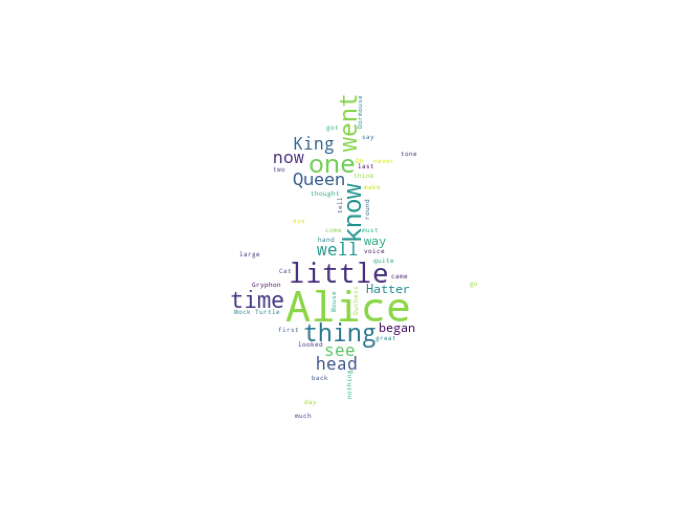

In [71]:

text=open('data/wordcloud/alice.txt').read()
text


stopwords = set(STOPWORDS)
stopwords.add('said')

#최대 단어 설정 max_words=
wc=WordCloud(max_font_size=40,background_color='white',mask=alice_mask,
            stopwords=stopwords,max_words=50).generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis('off')

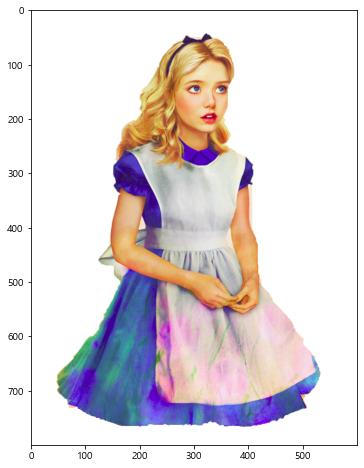

In [72]:
#컬러이미지로 해보쟈
alice_color=np.array(Image.open('data/wordcloud/alice.png'))

plt.figure(figsize=(8,8))
plt.imshow(alice_color)

(-0.5, 599.5, 799.5, -0.5)

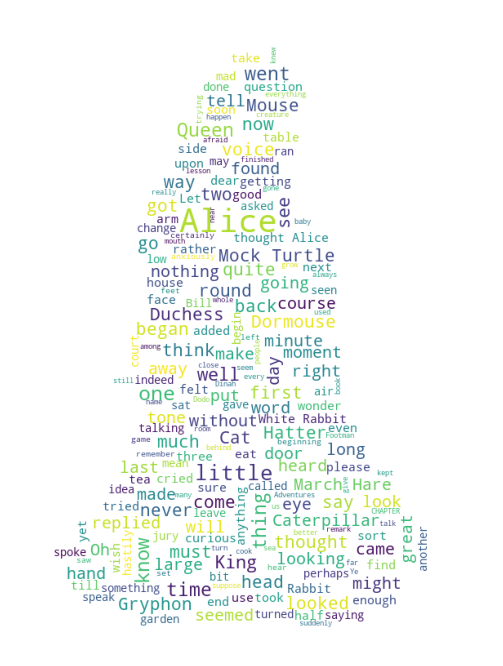

In [74]:
wc=WordCloud(max_font_size=40,background_color='white',mask=alice_color,
            stopwords=stopwords,max_words=200).generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis('off')

In [13]:
import wordcloud
wc=WordCloud(max_font_size=40,background_color='black',mask=alice_color,
            stopwords=stopwords,max_words=200).generate(text)

#실제 컬러이미지에 있던것을 활용하기 스포이드처럼 뽑아서 사용 
image_colors=wordcloud.ImageColorGenerator(alice_color)


plt.figure(figsize=(12,12))

#이렇게 컬러를 지정해줘야함.
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis('off')

NameError: name 'WordCloud' is not defined

In [8]:
##### 한글을 자연어 처리!! 
#http://konlpy.org --> 참고 사이트 
#pip install konlpy

#Okt(twitter) --> 형태소 분석하는 모듈들 
#Hannanum Class
# Kkma Class
# Komoran Class
# Mecab Class

from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk #워드카운팅 함수(한글)
from wordcloud import WordCloud

In [6]:
import tweepy
tweepy.__version__

'3.10.0'

In [6]:
okt=Okt()
okt.nouns('아버지가방에들어가신다.')

['아버지', '가방']

In [48]:
ko_text=kolaw.open('constitution.txt').read()
ko_text

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정

In [61]:
#단순히 공백으로 나눌것이면 split만하면 되는데 명사들만 구분하고 싶다면?
#형태소 분석
okt=Okt()
token_ko=okt.nouns(ko_text)
token_ko
print(len(token_ko))

#불용어사전- 한글판은 없음 따로 만들어서 필터링해줘야함. 
stop_words=['제','월','일','조','때','그','이','바','및','안','정','위','관','수','장']
token_ko = [word for word in token_ko if word not in stop_words]
print(len(token_ko))


# 워드 카운팅 
ko=nltk.Text(token_ko,name='대한민국 헌법')
dir(ko)
data=ko.vocab().most_common(50) #이미 카운팅을 해놨기 때문에 가장 많이 나온 단어 50개 뽑는것 

3882
3196


(-0.5, 399.5, 199.5, -0.5)

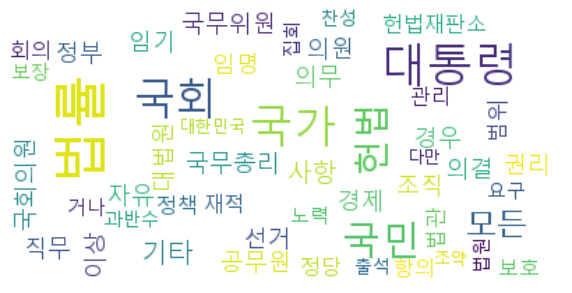

In [66]:
wc=WordCloud(max_font_size=40,background_color='white',
             font_path='C:/Windows/Fonts/malgun.ttf').generate_from_frequencies(dict(data)) #카운팅 했기 때문에 프리퀀시
#영어는 비율로 했기 때문에 generate, 한글은 dict형식으로 바꿔서 해야함.
plt.figure(figsize=(10,10))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')

In [46]:
for data in token_ko:
    if data in stop_words:
        token_ko.remove(data)
        
print(len(token_ko))

3378


In [54]:
#왜 안나올까
for i in token_ko:
    if data in stop_words:
        token_ko.remove(i)
        
print(len(token_ko))

3299
